In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-53.53496906761627 -71.28646039985239
-44.99266575317158 -32.49884582695586
59.03850425367395 -73.01997214379021
-53.45532128233521 103.18774796038434
-75.2473958576377 -24.357571672416412
55.26651393262753 -76.12683974404517
-16.880994122665044 -152.248574234358
-8.609437984487741 -31.742327473473296
29.941540730484917 67.617206401429
73.96173560844454 152.7249160970344
53.186710751737365 122.48746316646304
72.56516364281376 -63.139645586706905
-70.29936262763164 -176.77312344299702
5.026373359165021 146.7305238623465
83.39862867706805 -164.42162537458162
-76.65762160030378 94.15966265202235
34.099428474553704 135.91505611063928
-37.87188084949253 -48.388190513243046
-81.99125209310854 -43.028453200563064
25.288077843955136 -76.73734311561807
36.158757300906416 -55.703189138329336
-35.85834788023156 -37.5513826187933
45.486993488152564 -3.594481134939741
-17.364501222426085 -167.75713864743324
-34.975921773842224 177.68545560147294
-51.41670187570013 136.94266473017967
-50.32089690707

49.567757159393835 14.713279298608626
-26.18764384119543 -146.7750018293802
-0.9516896914165898 99.54644562804191
47.092410944222934 -25.606998654476882
42.416356159171784 146.81980177632295
-30.41096598119018 -122.88148955149924
-75.45914776585943 -150.51303777032837
-57.86844110457052 61.91524724165794
-36.52778587003298 -36.03904076094662
-78.55572183294976 -40.68004744129129
61.64705266194218 -140.41609038832803
-46.24340131728905 6.6625618178894115
64.91841334165272 38.22553169516004
-61.25139139779906 -107.17629818108875
84.79240170471192 116.5408798912141
-17.519945455066463 -21.13522995346537
56.795329577785424 -1.2922690412752615
74.55229810727229 150.9154781824006
-25.214762901347513 -56.96230179521676
44.71934353205097 -135.62066814802398
45.11888982301383 -123.98073916813277
43.877708809394505 -54.18562307030433
37.71152985187577 -140.736838217554
-65.01037306148883 -8.666687098477865
-46.541438560022364 -144.69485523863574
-8.340902957292315 -76.51320235879369
-46.92402240

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
#Import requests and weather_api_key
import requests
from config import weather_api_key

#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [7]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes. 
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the dat to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# #Loop through all the cities in our list:
# for i in range(len(cities)):
#     #Group cities in sets of 50 for logging purposes.
#     if(i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)
        
#     #create endpoint url with each city
#     city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | chapais
Processing Record 7 of Set 1 | vaitape
Processing Record 8 of Set 1 | olinda
Processing Record 9 of Set 1 | mach
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | yerofey pavlovich
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | kawai
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | dunmore town
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | laguna
Processing Record 22 of Set 1 | santander
Processing Record 23 of Set 1 | alofi
Process

Processing Record 42 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 4 | amapa
Processing Record 44 of Set 4 | guanambi
Processing Record 45 of Set 4 | srednekolymsk
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | aljustrel
Processing Record 48 of Set 4 | mildura
Processing Record 49 of Set 4 | praia da vitoria
Processing Record 50 of Set 4 | carlsbad
Processing Record 1 of Set 5 | tual
Processing Record 2 of Set 5 | rungata
City not found. Skipping...
Processing Record 3 of Set 5 | southbridge
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | great yarmouth
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | ostrovnoy
Processing Record 8 of Set 5 | duz
City not found. Skipping...
Processing Record 9 of Set 5 | saint-augustin
Processing Record 10 of Set 5 | nadym
Processing Record 11 of Set 5 | ayios vasilios
Processing Record 12 of Set 5 | malanje
Processing Record 13 of Set 5 | sayyan
Processi

Processing Record 27 of Set 8 | walvis bay
Processing Record 28 of Set 8 | antofagasta
Processing Record 29 of Set 8 | naze
Processing Record 30 of Set 8 | omboue
Processing Record 31 of Set 8 | bilibino
Processing Record 32 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 33 of Set 8 | chardara
Processing Record 34 of Set 8 | amga
Processing Record 35 of Set 8 | mitsamiouli
Processing Record 36 of Set 8 | gallup
Processing Record 37 of Set 8 | raudeberg
Processing Record 38 of Set 8 | hounde
Processing Record 39 of Set 8 | sao gabriel da cachoeira
Processing Record 40 of Set 8 | davila
Processing Record 41 of Set 8 | gambo
Processing Record 42 of Set 8 | alugan
Processing Record 43 of Set 8 | garzon
Processing Record 44 of Set 8 | yulara
Processing Record 45 of Set 8 | nizhniy kuranakh
Processing Record 46 of Set 8 | marcona
City not found. Skipping...
Processing Record 47 of Set 8 | cartagena
Processing Record 48 of Set 8 | bassar
Processing Record 49 of Set 8 | lu

Processing Record 18 of Set 12 | mount gambier
Processing Record 19 of Set 12 | taunggyi
Processing Record 20 of Set 12 | port moresby
Processing Record 21 of Set 12 | balkanabat
Processing Record 22 of Set 12 | bonthe
Processing Record 23 of Set 12 | tiznit
Processing Record 24 of Set 12 | oksfjord
Processing Record 25 of Set 12 | hue
Processing Record 26 of Set 12 | north bend
Processing Record 27 of Set 12 | talaja
Processing Record 28 of Set 12 | elizabeth city
Processing Record 29 of Set 12 | panguna
Processing Record 30 of Set 12 | brigantine
Processing Record 31 of Set 12 | maamba
Processing Record 32 of Set 12 | bafra
Processing Record 33 of Set 12 | longlac
City not found. Skipping...
Processing Record 34 of Set 12 | villa carlos paz
Processing Record 35 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 36 of Set 12 | katsiveli
City not found. Skipping...
Processing Record 37 of Set 12 | kapustin yar-1
City not found. Skipping...
Processing Record 38 of Set 

In [8]:
len(city_data)

580

In [9]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,32.11,93,20,20.71,CL,2022-07-21 23:37:26
1,Cidreira,-30.1811,-50.2056,62.64,90,90,3.98,BR,2022-07-21 23:41:13
2,Iqaluit,63.7506,-68.5145,44.33,87,20,4.61,CA,2022-07-21 23:39:15
3,Busselton,-33.6500,115.3333,59.56,79,76,9.75,AU,2022-07-21 23:41:14
4,Ushuaia,-54.8000,-68.3000,31.66,86,75,28.77,AR,2022-07-21 23:37:56
5,Chapais,49.7834,-74.8492,65.98,94,99,12.21,CA,2022-07-21 23:41:14
6,Vaitape,-16.5167,-151.7500,77.23,73,13,10.92,PF,2022-07-21 23:41:15
7,Olinda,-8.0089,-34.8553,76.73,78,20,6.91,BR,2022-07-21 23:41:15
8,Mach,29.8637,67.3298,78.51,83,93,3.13,PK,2022-07-21 23:41:16
9,Chokurdakh,70.6333,147.9167,55.94,32,3,7.67,RU,2022-07-21 23:41:16


In [10]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-07-21 23:37:26,-53.1500,-70.9167,32.11,93,20,20.71
1,Cidreira,BR,2022-07-21 23:41:13,-30.1811,-50.2056,62.64,90,90,3.98
2,Iqaluit,CA,2022-07-21 23:39:15,63.7506,-68.5145,44.33,87,20,4.61
3,Busselton,AU,2022-07-21 23:41:14,-33.6500,115.3333,59.56,79,76,9.75
4,Ushuaia,AR,2022-07-21 23:37:56,-54.8000,-68.3000,31.66,86,75,28.77
5,Chapais,CA,2022-07-21 23:41:14,49.7834,-74.8492,65.98,94,99,12.21
6,Vaitape,PF,2022-07-21 23:41:15,-16.5167,-151.7500,77.23,73,13,10.92
7,Olinda,BR,2022-07-21 23:41:15,-8.0089,-34.8553,76.73,78,20,6.91
8,Mach,PK,2022-07-21 23:41:16,29.8637,67.3298,78.51,83,93,3.13
9,Chokurdakh,RU,2022-07-21 23:41:16,70.6333,147.9167,55.94,32,3,7.67


In [11]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

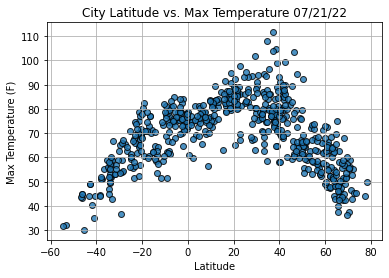

In [13]:
#Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

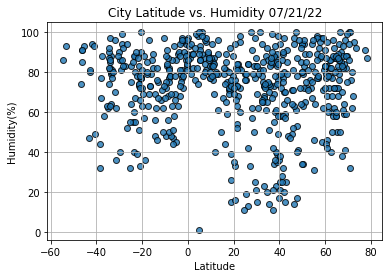

In [14]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

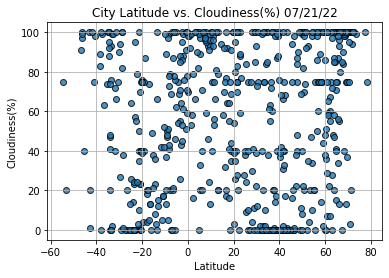

In [15]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

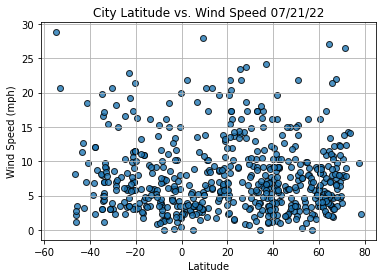

In [16]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [17]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line and the equation with
#the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                     Lorengau
Country                        PG
Date          2022-07-21 23:39:37
Lat                       -2.0226
Lng                      147.2712
Max Temp                    84.15
Humidity                       72
Cloudiness                     88
Wind Speed                  10.18
Name: 13, dtype: object

In [19]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

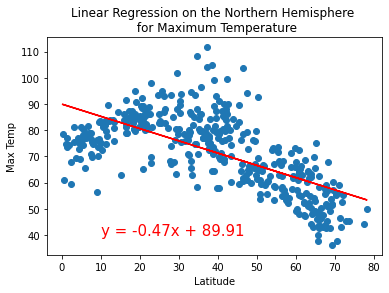

In [20]:
#Linear regression on the Maximum Temperature for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40)
                      )

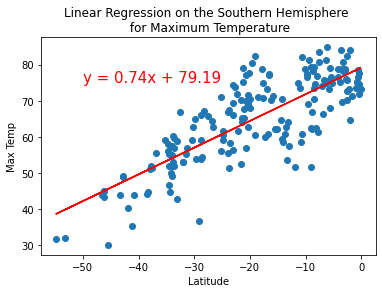

In [28]:
#Linear regression on the Maximum Temperature for the Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,75)
                      )

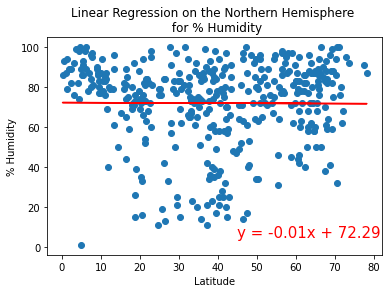

In [27]:
#Linear regression on the Humidity for the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45,5)
                      )

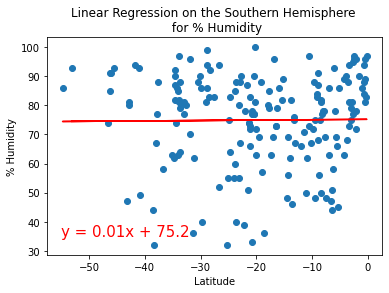

In [26]:
#Linear regression on the Humidity for the Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55,35)
                      )

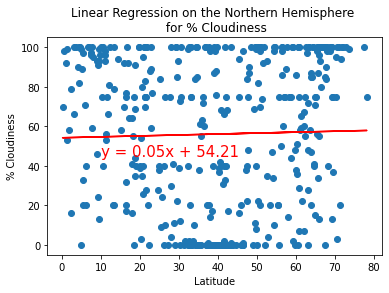

In [31]:
#Linear regression on the Cloudiness for the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,45)
                      )

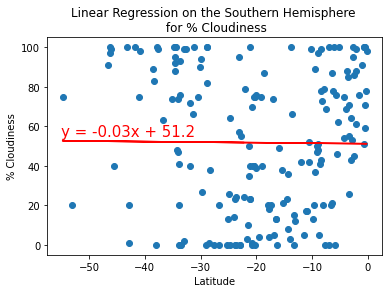

In [34]:
#Linear regression on the Cloudiness for the Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-55,55)
                      )

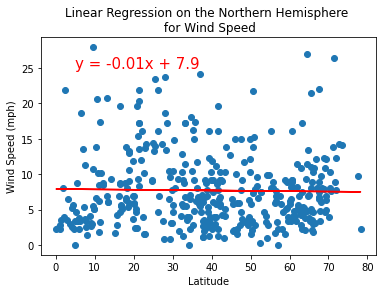

In [37]:
#Linear regression on the Wind Speed for the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (5,25)
                      )

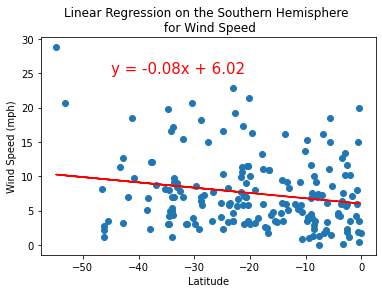

In [39]:
#Linear regression on the Wind Speed for the Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-45,25)
                      )